In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#ignore all Depricated Warning
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import io
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
print ('Ran')

Ran


In [2]:
app_train = pd.read_csv('C:/Users/dbda/Desktop/Work/Imputed Train/imputed_train.csv')

In [3]:
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 466)


In [4]:
X = app_train.drop(['TARGET','SK_ID_CURR'],axis=1)
y = app_train['TARGET']

In [5]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [6]:
count_class_0, count_class_1 = app_train['TARGET'].value_counts()

# Divide by class
df_class_0 = app_train[app_train['TARGET'] == 0]
df_class_1 = app_train[app_train['TARGET'] == 1]

Random over-sampling:
1    282686
0    282686
Name: TARGET, dtype: int64


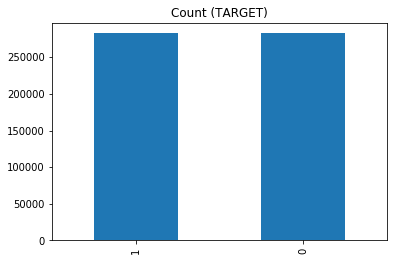

In [7]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['TARGET'].value_counts())

df_test_over['TARGET'].value_counts().plot(kind='bar', title='Count (TARGET)');

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

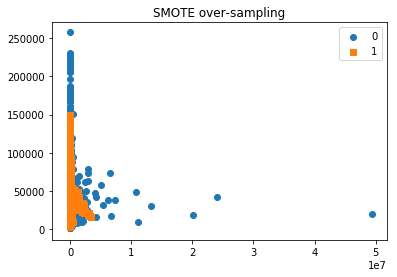

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [9]:
# Testing data features
app_test = pd.read_csv('C:/Users/dbda/Desktop/Work/Imputed Train/imputed_test.csv')

In [10]:
print('Testing data shape: ', app_test.shape)

Testing data shape:  (48744, 465)


In [11]:
train_sk_id_curr = app_train['SK_ID_CURR']
test_sk_id_curr = app_test['SK_ID_CURR']

In [12]:
app_test=app_test.drop('SK_ID_CURR',axis=1)

In [13]:
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

In [14]:
clf = CatBoostClassifier(iterations=500,
                              learning_rate=0.1,
                              depth=8,
                              loss_function='Logloss',
                              bootstrap_type='Bernoulli',
                              eval_metric='AUC',
                              class_weights=[1, 2],
                              random_seed=9, 
                              verbose=False)

In [26]:
clf.fit(X_sm, y_sm)
print('Fitted')

Fitted


In [27]:
y_pred = clf.predict_proba(app_test)[:,1]

In [28]:
submission = pd.DataFrame({'SK_ID_CURR': test_sk_id_curr, 'TARGET': y_pred})

In [29]:
submission.to_csv('C:/Users/dbda/Desktop/Work/CatBoost_v2/catboost_8.csv', index = False)